In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

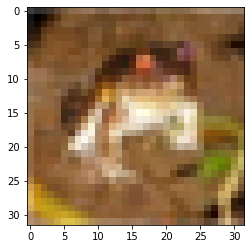

In [6]:
plt.imshow(x_train[0])

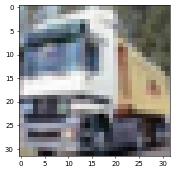

In [7]:
plt.figure(dpi=50)
plt.imshow(x_train[1])

In [8]:
x_train=x_train/250

In [9]:
x_test=x_test/250

In [10]:
y_cat_train=pd.get_dummies(y_train.reshape(50000)).values

In [11]:
y_cat_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
y_cat_test=pd.get_dummies(y_test.reshape(10000)).values

y_cat_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
base_mod=Sequential()

In [17]:
base_mod.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))

In [18]:
base_mod.add(MaxPool2D((2,2)))

In [19]:
base_mod.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

In [20]:
base_mod.add(MaxPool2D((2,2)))

In [21]:
#base_mod.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))

#base_mod.add(MaxPool2D((2,2)))     cause issse kaafi chots ho jata hai input matrix so kkaaf info loss atleast 1/5 of 
#height and width rehna chahiye before flattening

In [22]:
base_mod.add(Flatten())

In [23]:
base_mod.add(Dense( units=1660,
    activation='relu'))
base_mod.add(Dropout(0.15))

In [24]:
base_mod.add(Dense( units=800,
    activation='relu'))
base_mod.add(Dropout(0.15))

In [25]:
base_mod.add(Dense( units=400,
    activation='relu'))
base_mod.add(Dropout(0.15))

In [26]:
base_mod.add(Dense( units=200,
    activation='relu'))
base_mod.add(Dropout(0.15))

In [27]:
base_mod.add(Dense( units=100,
    activation='relu'))
base_mod.add(Dropout(0.15))
base_mod.add(Dense( units=50,
    activation='relu'))        # skip the second last neuron state of 25 cause mere isme 25 features are kaafi come for one 
#image to classify it into the following 10 categoreis so even if every  image ka 5 different features consider kiya toh around
#50 neurons ya 50 input hona chahiye second last layer mai..if 20 classes hota maybe mai 100-140 neurons rakhta scond last mai
#..cause jaise no of images increases the no of distinct features to properly classify must also increase at the end it all 
#depends upon the image type the type of categories and how different each image category is cause the larger the variation 
#between different image classes the less no of features are required to classify
base_mod.add(Dropout(0.15))
#base_mod.add(Dense( units=25,
    #activation='relu'))
#base_mod.add(Dropout(0.15))

In [28]:
base_mod.add(Dense( units=10,
    activation='softmax'))

In [29]:
base_mod.compile(optimizer='adam',
    loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=5)

In [31]:
base_mod.fit(x_train,y_cat_train,batch_size=512, validation_data=(x_test,y_cat_test),epochs=50,callbacks=[early])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.9374 - accuracy: 0.2598 - val_loss: 1.5317 - val_accuracy: 0.4450
Epoch 2/50
50000/50000 [==============================] - 49s 970us/sample - loss: 1.4437 - accuracy: 0.4768 - val_loss: 1.2683 - val_accuracy: 0.5400
Epoch 3/50
50000/50000 [==============================] - 46s 925us/sample - loss: 1.2311 - accuracy: 0.5611 - val_loss: 1.1397 - val_accuracy: 0.5935
Epoch 4/50
50000/50000 [==============================] - 46s 927us/sample - loss: 1.0704 - accuracy: 0.6255 - val_loss: 1.0316 - val_accuracy: 0.6341
Epoch 5/50
50000/50000 [==============================] - 47s 931us/sample - loss: 0.9200 - accuracy: 0.6822 - val_loss: 0.9962 - val_accuracy: 0.6523
Epoch 6/50
50000/50000 [==============================] - 46s 919us/sample - loss: 0.7749 - accuracy: 0.7349 - val_loss: 0.9531 - val_accuracy: 0.6873
Epoch 7/50
50000/50000 [======================

## as we can see by choosing some appropriate measure our model peformed well..lets try with some models 

In [32]:
base_mod.save('CIFAR-10-MODEL.tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CIFAR-10-MODEL.tf\assets


In [33]:
pred=base_mod.predict_classes(x_test)

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
print(classification_report(y_cat_test,pd.get_dummies(pred)))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.80      0.82      0.81      1000
           2       0.65      0.53      0.58      1000
           3       0.48      0.47      0.47      1000
           4       0.68      0.58      0.63      1000
           5       0.54      0.62      0.58      1000
           6       0.77      0.78      0.77      1000
           7       0.72      0.77      0.74      1000
           8       0.85      0.75      0.80      1000
           9       0.68      0.86      0.76      1000

   micro avg       0.69      0.69      0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000
 samples avg       0.69      0.69      0.69     10000



In [43]:
pred

array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

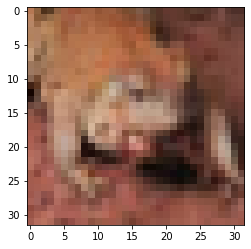

In [45]:
plt.imshow(x_test[5])

In [46]:
y_test[5]

array([6], dtype=uint8)

In [48]:
base_mod.predict_classes(x_test[5].reshape(1,32,32,3))

array([6], dtype=int64)

In [49]:
# hence we are predicting accurately